<a href="https://colab.research.google.com/github/ahmer-cs/Ahmer-Waqar/blob/master/Copy_of_BleedAi(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DESCRIPTION

This task is done to provide the most dominant colors out of the image and for that I have recycled the image through various steps in terms of resizing and flattening the image.After that I have apply kmeans algorithm which is very good for tackling up images by any means.Initially I have set the variable "Cluster value" to 5, you can change it if you want to see more precise results, so it will make 5 clusters from your provided image, whatever the cluster value you set it will give accordingly the exact percentage of that each color present in the image because of its clustered center nature. It will also show you the proportions of color.

## Importing Libraries

 - **numpy** : OpenCV uses Numpy for numerical operation. Hence Numpy is used to align input with the respective data type
 
 - **cv2** : OpenCV used for image processing
 
 - **imutils** :  Useful utilities for image processing
 
 - **matplotlib** :  Normally used as a graph plotting lirbary , but we will use it show inline images since "cv2.imshow" doesn't work on collab

An unsupervised clustering algorithm,**KMeans**Clustering is used to cluster the pixel data based on their RGB values.

Org image shape -->  (190, 265, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.product is deprecated and will be removed in SciPy 2.0.0, use numpy.product instead


cluster centres:
 [[242.36306215 238.89641233 243.9871147 ]
 [ 37.88481894  31.71727019  33.30598886]
 [ 73.05717747  51.44675954  98.47437916]
 [ 94.45684448  70.82399918 212.81754889]
 [  3.60412254   2.57352496   2.98748109]]
most frequent is [3.60412254 2.57352496 2.98748109] (#030202)
After resizing shape -->  (200, 278, 3)
After Flattening shape -->  (55600, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.argmax is deprecated and will be removed in SciPy 2.0.0, use numpy.argmax instead


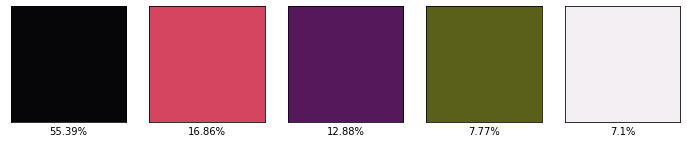

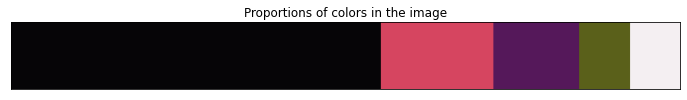

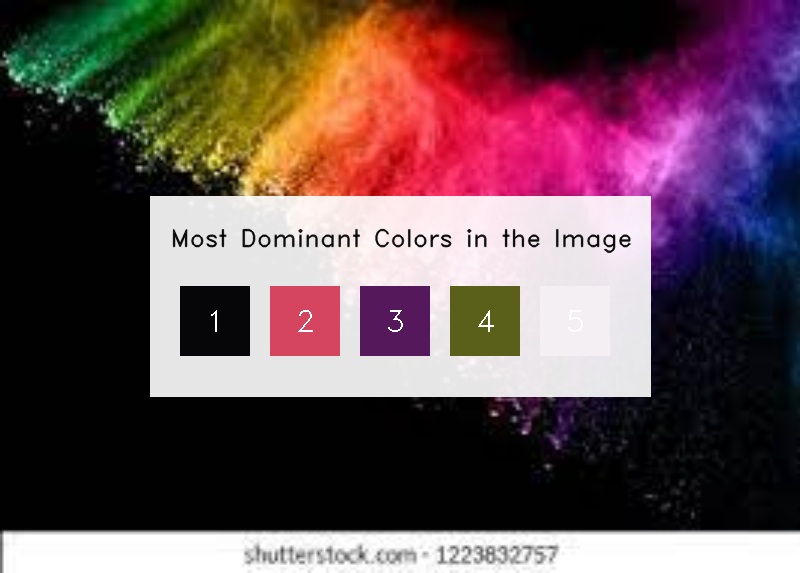

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils
import scipy
import scipy.misc
import scipy.cluster
import binascii

#this is because on 4rth last line I was using cv2.imshow('img',final) but there was an error of cv2.imshow() is disabled in colab,so I used alternative of it.
from google.colab.patches import cv2_imshow

clusters = 5 # try changing it
img = cv2.imread('colors.jpg')

# Making a copy of original data
org_img = img.copy()

# Original Image
print('Org image shape --> ',img.shape)
img = imutils.resize(img,height=200)

# Making an array for the images
arr = np.asarray(img)
shape = arr.shape
ar = arr.reshape(scipy.product(shape[:2]), shape[2]).astype(float)
codes, dist = scipy.cluster.vq.kmeans(ar, clusters)
print('cluster centres:\n', codes)

# assign codes
vecs, dist = scipy.cluster.vq.vq(ar, codes)
counts, bins = scipy.histogram(vecs, len(codes))  

# find most frequent
index_max = scipy.argmax(counts)
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most Dominant Color is %s (#%s)' % (peak, colour))

# After resizing the height to most 200,
print('After resizing shape --> ',img.shape)
flat_img = np.reshape(img,(-1,3))


# Flattening the image to be more specific with the details cause multidimensional arrays are more memory consuming
print('After Flattening shape --> ',flat_img.shape)

#Using K-Means algorithm because its a good approach for image classification and to make clusters out of your data 
kmeans = KMeans(n_clusters=clusters,random_state=0)

# Fitting kmeans to our flatten data
kmeans.fit(flat_img)

# Making cluster centered point so that each point is directed towards its similar area
colors = np.array(kmeans.cluster_centers_,dtype='uint')
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]

# Here I have used zip to make parallel iteration possible and storing it in a common variable p_and_c
p_and_c = zip(percentages,colors)

# Sorted and reversed
p_and_c = sorted(p_and_c,reverse=True)

# Defining each block of color and assigning it value to 1
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))

# Performing iteration for the no of clusters
for i in range(clusters):
    plt.subplot(1,clusters,i+1)

# Done this to convert bgr(opencv) to rgb(matplotlib) 
    block[:] = p_and_c[i][1][::-1]
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])

# Labeling with the intensity of colors in %
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

def proportion_Bar():
  bar = np.ones((50,500,3),dtype='uint')
  plt.figure(figsize=(12,8))
  plt.title('Proportions of colors in the image')
  start = 0
  i = 1
  for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
      bar[:,start:] = c[::-1]
    else:
      bar[:,start:end] = c[::-1]
    start = end
    i+=1
  plt.imshow(bar)
  plt.xticks([])
  plt.yticks([])

def dominant_Colors():
  rows = 800
  cols = int((org_img.shape[0]/org_img.shape[1])*rows)
  img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)
  copy = img.copy()
  cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

# Here I have added weight to our Sources of images by defining the values of Alpha ,Beta and Gama
  final = cv2.addWeighted(img,0.1,copy,0.9,0)
  cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)
  start = rows//2-220
  for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1)
    start = end+20
  plt.show()
  cv2_imshow(final)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  cv2.imwrite('output1.png',final)
  plt.show()

#Calling methods
proportion_Bar()
dominant_Colors()